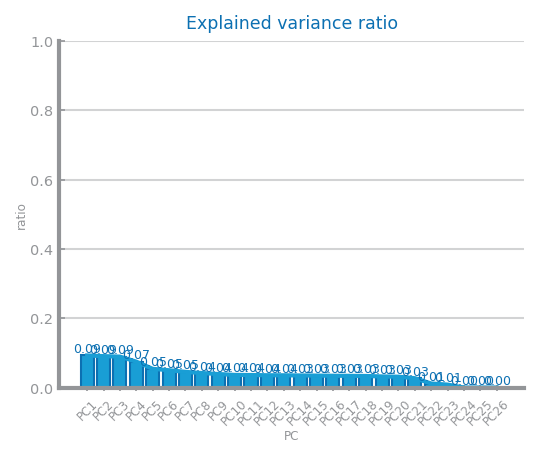

In [3]:
from pandas import read_csv, DataFrame
from matplotlib.pyplot import figure, show, gca
from dslabs_functions import plot_multi_scatters_chart
from sklearn.decomposition import PCA
from pandas import Series, Index
from matplotlib.axes import Axes
from dslabs_functions import plot_bar_chart

data: DataFrame = read_csv("../dataset/train_dataset_1.csv")
target = "JURISDICTION_CODE"


target_data: Series = data.pop(target)
index: Index = data.index
pca = PCA()
pca.fit(data)

xvalues: list[str] = [f"PC{i+1}" for i in range(len(pca.components_))]
figure()
ax: Axes = gca()
plot_bar_chart(
    xvalues,
    pca.explained_variance_ratio_,
    ax=ax,
    title="Explained variance ratio",
    xlabel="PC",
    ylabel="ratio",
    percentage=True,
)
ax.plot(pca.explained_variance_ratio_)
show()

In [11]:
# Calcul du cumul de la variance expliquée
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Trouver le nombre minimal de composantes pour expliquer 95% de la variance
n_components_95 = (cumulative_variance >= 0.99).argmax() + 1

print(f"Nombre de composantes nécessaires pour expliquer 95% de la variance : {n_components_95}")


Nombre de composantes nécessaires pour expliquer 95% de la variance : 22
